In [20]:
# --- Task 2: Model Building and Training ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Load cleaned datasets
fraud_df = pd.read_csv('../data/Fraud_Data.csv')
credit_df = pd.read_csv('../data/creditcard.csv')


In [ ]:
#Separate Features and Target

# Fraud_Data
X_fraud = fraud_df.drop(['class'], axis=1)
y_fraud = fraud_df['class']

# Creditcard
X_credit = credit_df.drop(['Class'], axis=1)
y_credit = credit_df['Class']

In [18]:
# Use only numeric columns for modeling
from sklearn.model_selection import train_test_split

X_fraud_numeric = X_fraud.select_dtypes(include=[np.number])
X_credit_numeric = X_credit.select_dtypes(include=[np.number])

# Split Fraud_Data
X_train_fraud, X_test_fraud, y_train_fraud, y_test_fraud = train_test_split(
    X_fraud_numeric, y_fraud, test_size=0.2, random_state=42, stratify=y_fraud
)
# Split Creditcard
X_train_credit, X_test_credit, y_train_credit, y_test_credit = train_test_split(
    X_credit_numeric, y_credit, test_size=0.2, random_state=42, stratify=y_credit
)


In [ ]:
#Step 2: Model Selection

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize models
logreg = LogisticRegression(max_iter=1000, random_state=42)  #Logistic Regression (baseline)
rf = RandomForestClassifier(n_estimators=100, random_state=42) #Random Forest (powerful ensemble)

In [19]:

# Model Training and Evaluation
from sklearn.metrics import f1_score, confusion_matrix, average_precision_score, classification_report

for model, name in [(logreg, "Logistic Regression"), (rf, "Random Forest")]:
    print(f"\n{name} on Fraud_Data")
    model.fit(X_train_fraud, y_train_fraud)
    y_pred = model.predict(X_test_fraud)
    y_proba = model.predict_proba(X_test_fraud)[:, 1]
    print("F1 Score:", f1_score(y_test_fraud, y_pred))
    print("AUC-PR:", average_precision_score(y_test_fraud, y_proba))
    print("Confusion Matrix:\n", confusion_matrix(y_test_fraud, y_pred))
    print("Classification Report:\n", classification_report(y_test_fraud, y_pred))

for model, name in [(logreg, "Logistic Regression"), (rf, "Random Forest")]:
    print(f"\n{name} on Creditcard")
    model.fit(X_train_credit, y_train_credit)
    y_pred = model.predict(X_test_credit)
    y_proba = model.predict_proba(X_test_credit)[:, 1]
    print("F1 Score:", f1_score(y_test_credit, y_pred))
    print("AUC-PR:", average_precision_score(y_test_credit, y_proba))
    print("Confusion Matrix:\n", confusion_matrix(y_test_credit, y_pred))
    print("Classification Report:\n", classification_report(y_test_credit, y_pred))


Logistic Regression on Fraud_Data
F1 Score: 0.0
AUC-PR: 0.09272622425960018
Confusion Matrix:
 [[27393     0]
 [ 2830     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     27393
           1       0.00      0.00      0.00      2830

    accuracy                           0.91     30223
   macro avg       0.45      0.50      0.48     30223
weighted avg       0.82      0.91      0.86     30223


Random Forest on Fraud_Data


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


F1 Score: 0.5165165165165165
AUC-PR: 0.5194617128113129
Confusion Matrix:
 [[27259   134]
 [ 1798  1032]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     27393
           1       0.89      0.36      0.52      2830

    accuracy                           0.94     30223
   macro avg       0.91      0.68      0.74     30223
weighted avg       0.93      0.94      0.92     30223


Logistic Regression on Creditcard


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1 Score: 0.770949720670391
AUC-PR: 0.699044671658662
Confusion Matrix:
 [[56852    12]
 [   29    69]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.70      0.77        98

    accuracy                           1.00     56962
   macro avg       0.93      0.85      0.89     56962
weighted avg       1.00      1.00      1.00     56962


Random Forest on Creditcard
F1 Score: 0.8743169398907104
AUC-PR: 0.8733910547021404
Confusion Matrix:
 [[56859     5]
 [   18    80]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962



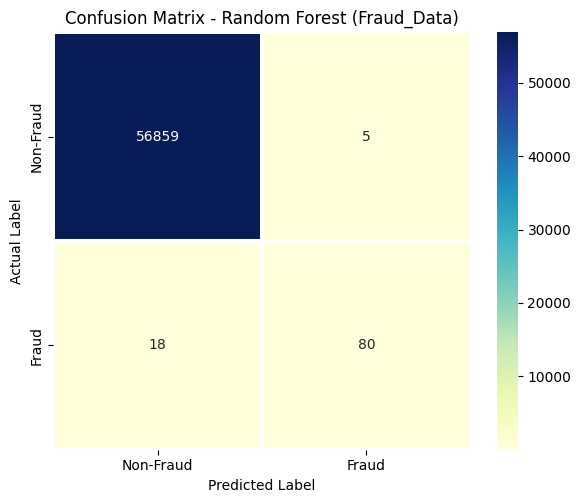

In [ ]:
# Confusion matrix visualization
cm = confusion_matrix(y_test_credit, y_pred)
plt.figure(figsize=(8, 6))  # Set figure size for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=True, square=True,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {name} (Creditcard)')
plt.show()